## Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, anderson
sns.set_style('darkgrid')

## Загрузим данные и посмотрим на них

In [2]:
data = pd.read_csv('NetflixOriginals.csv', encoding='latin-1')

In [3]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


## Посмотрим на распределение рейтинга IMDB

Text(0.5, 1.0, 'Distribution of IMDB Score')

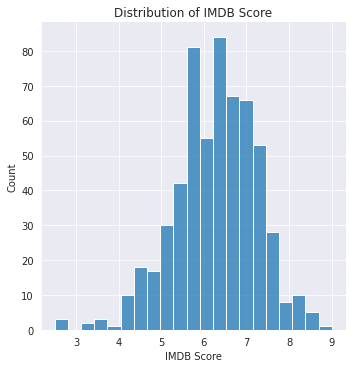

In [5]:
sns.displot(data['IMDB Score'])
plt.title('Distribution of IMDB Score')

## Посмотрим, как фильмы распределены по жанрам

Text(0.5, 1.0, 'Quantitative distribution by genre')

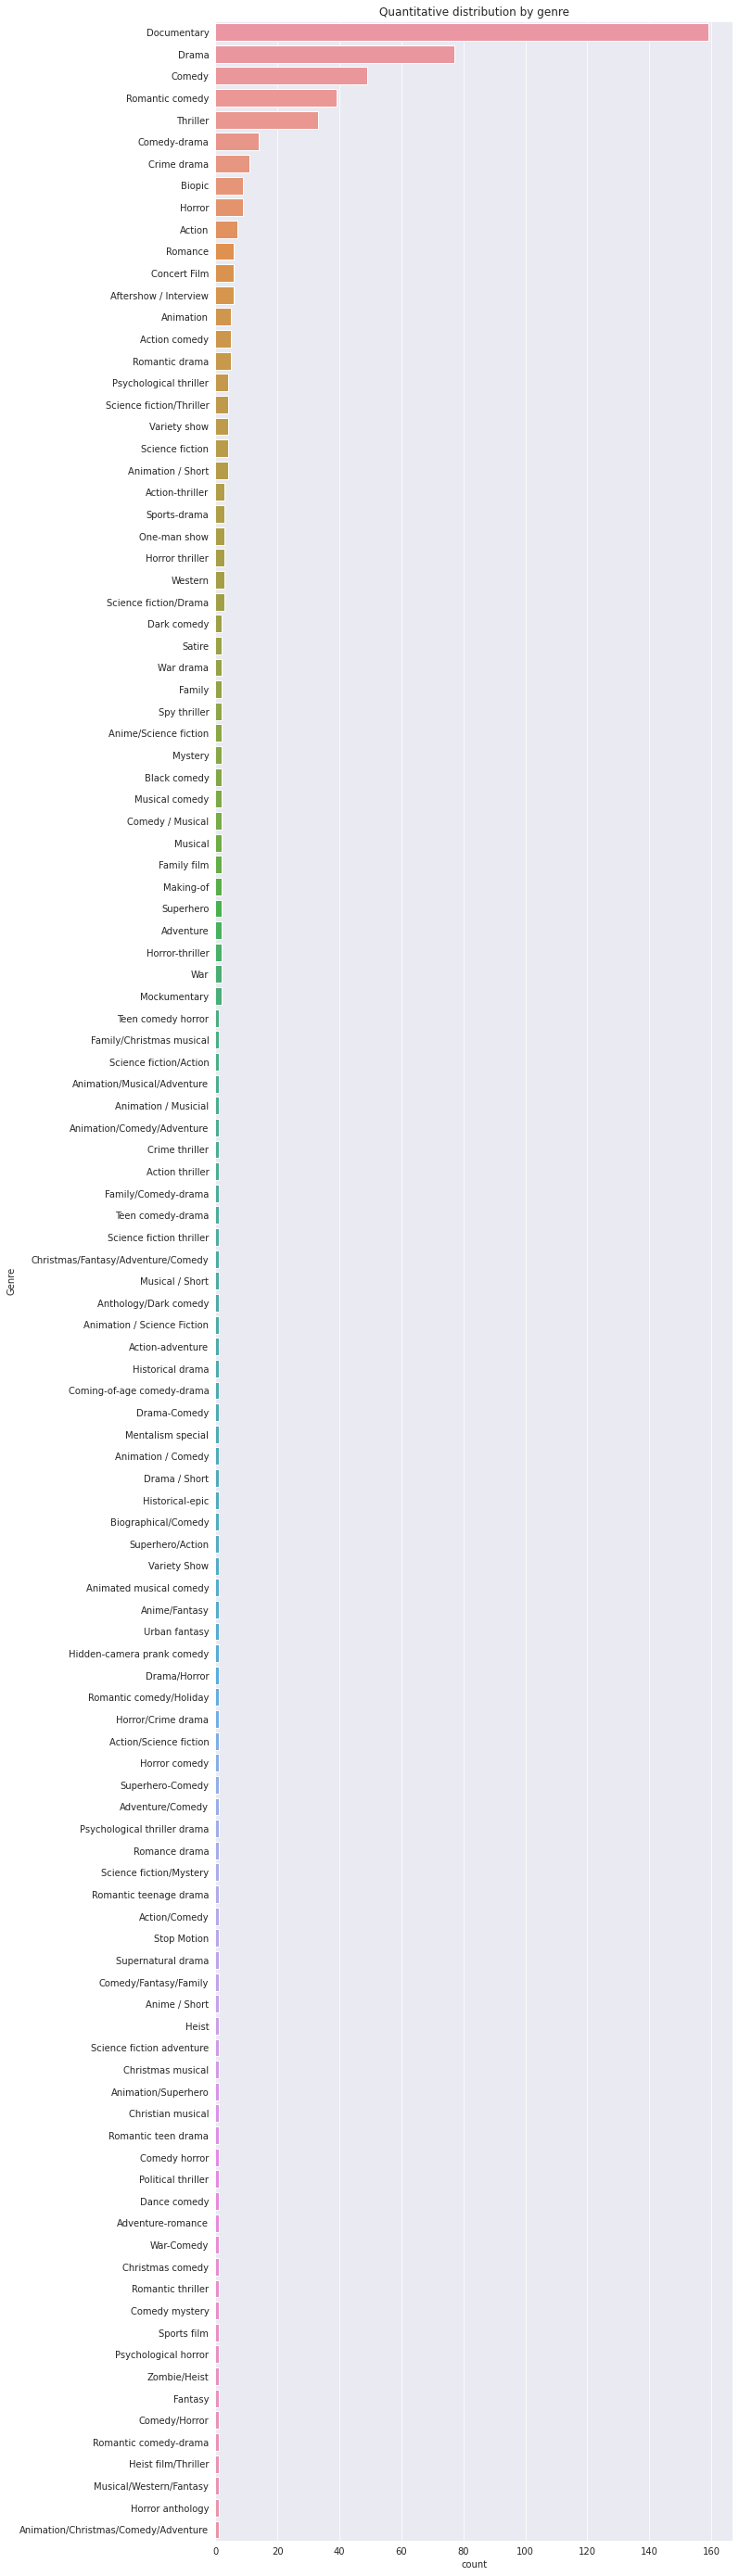

In [6]:
plt.figure(figsize=(10, 50))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Quantitative distribution by genre')

## Исследуем среднее значение рейтинга IMDB по жанрам

Text(0.5, 1.0, 'Average score by genre')

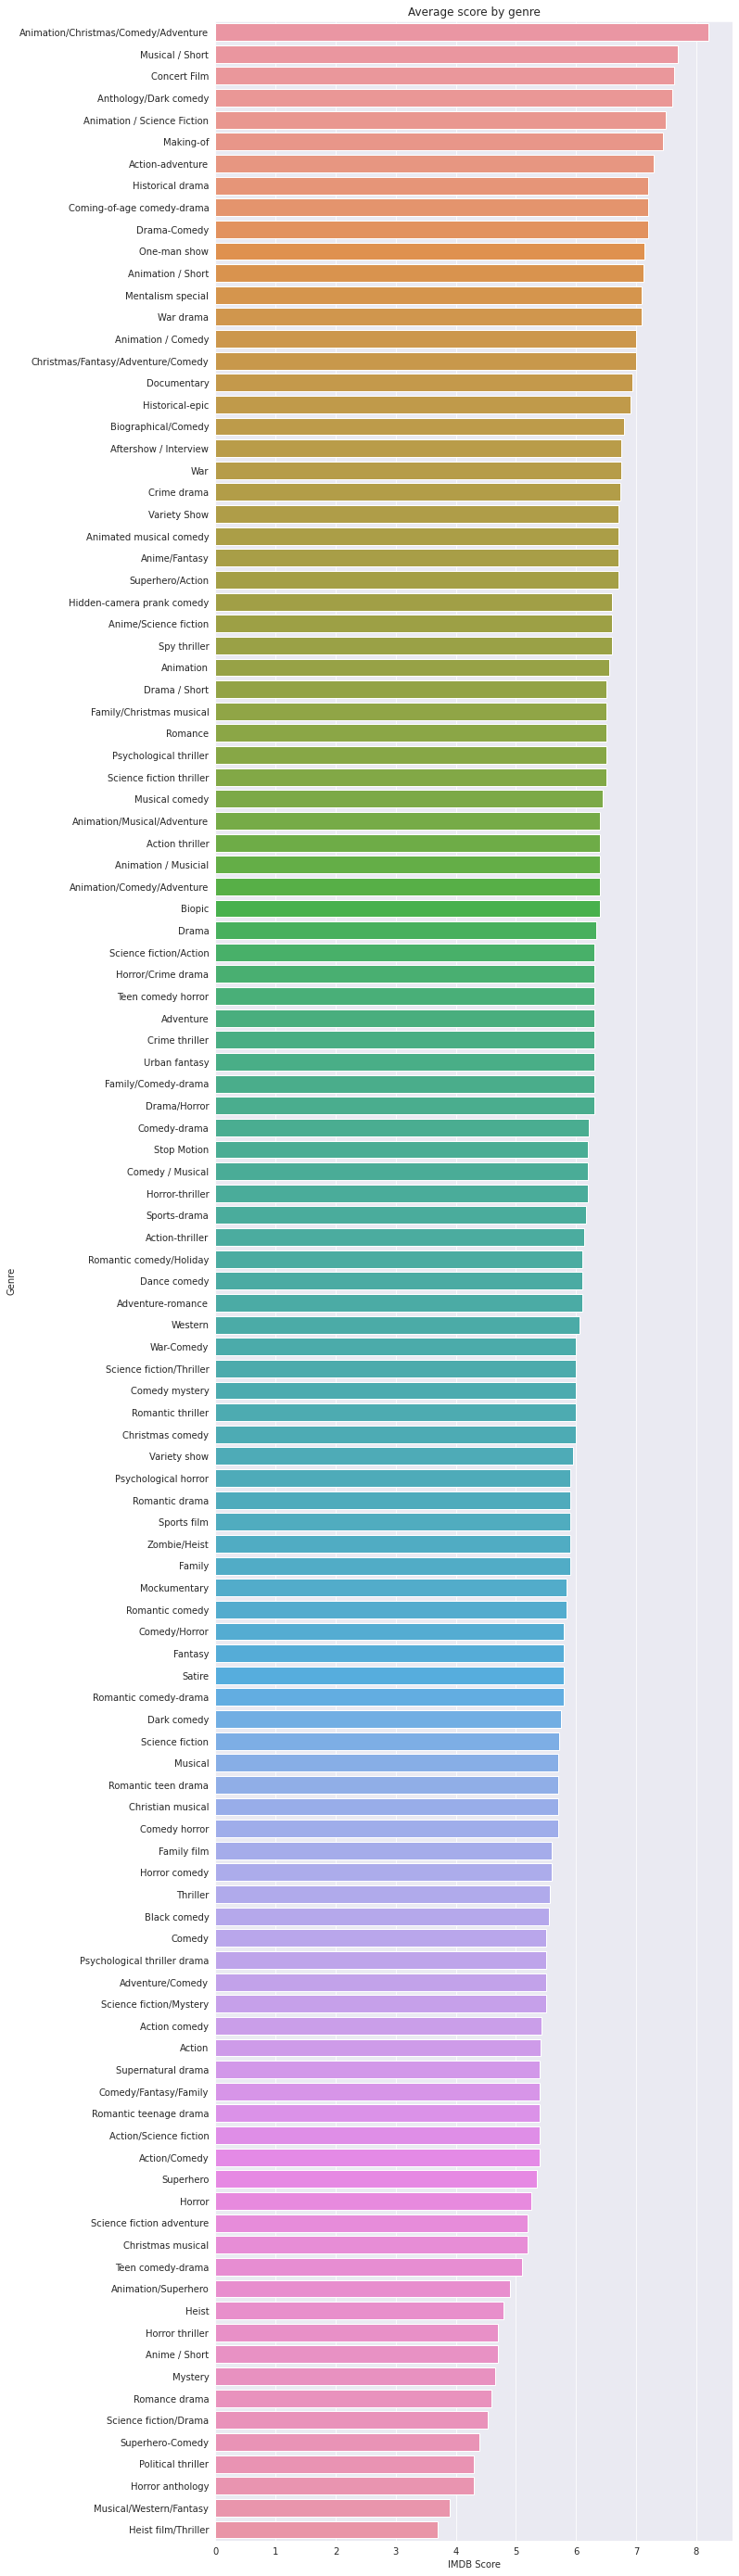

In [7]:
plt.figure(figsize=(10, 50))
sns.barplot(x='IMDB Score', y='Genre', data=data, ci=None,
            order=data.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).index)
plt.title('Average score by genre')

## Найдем среднюю продолжительность фильмов по жанрам

Text(0.5, 1.0, 'average runtime by genre')

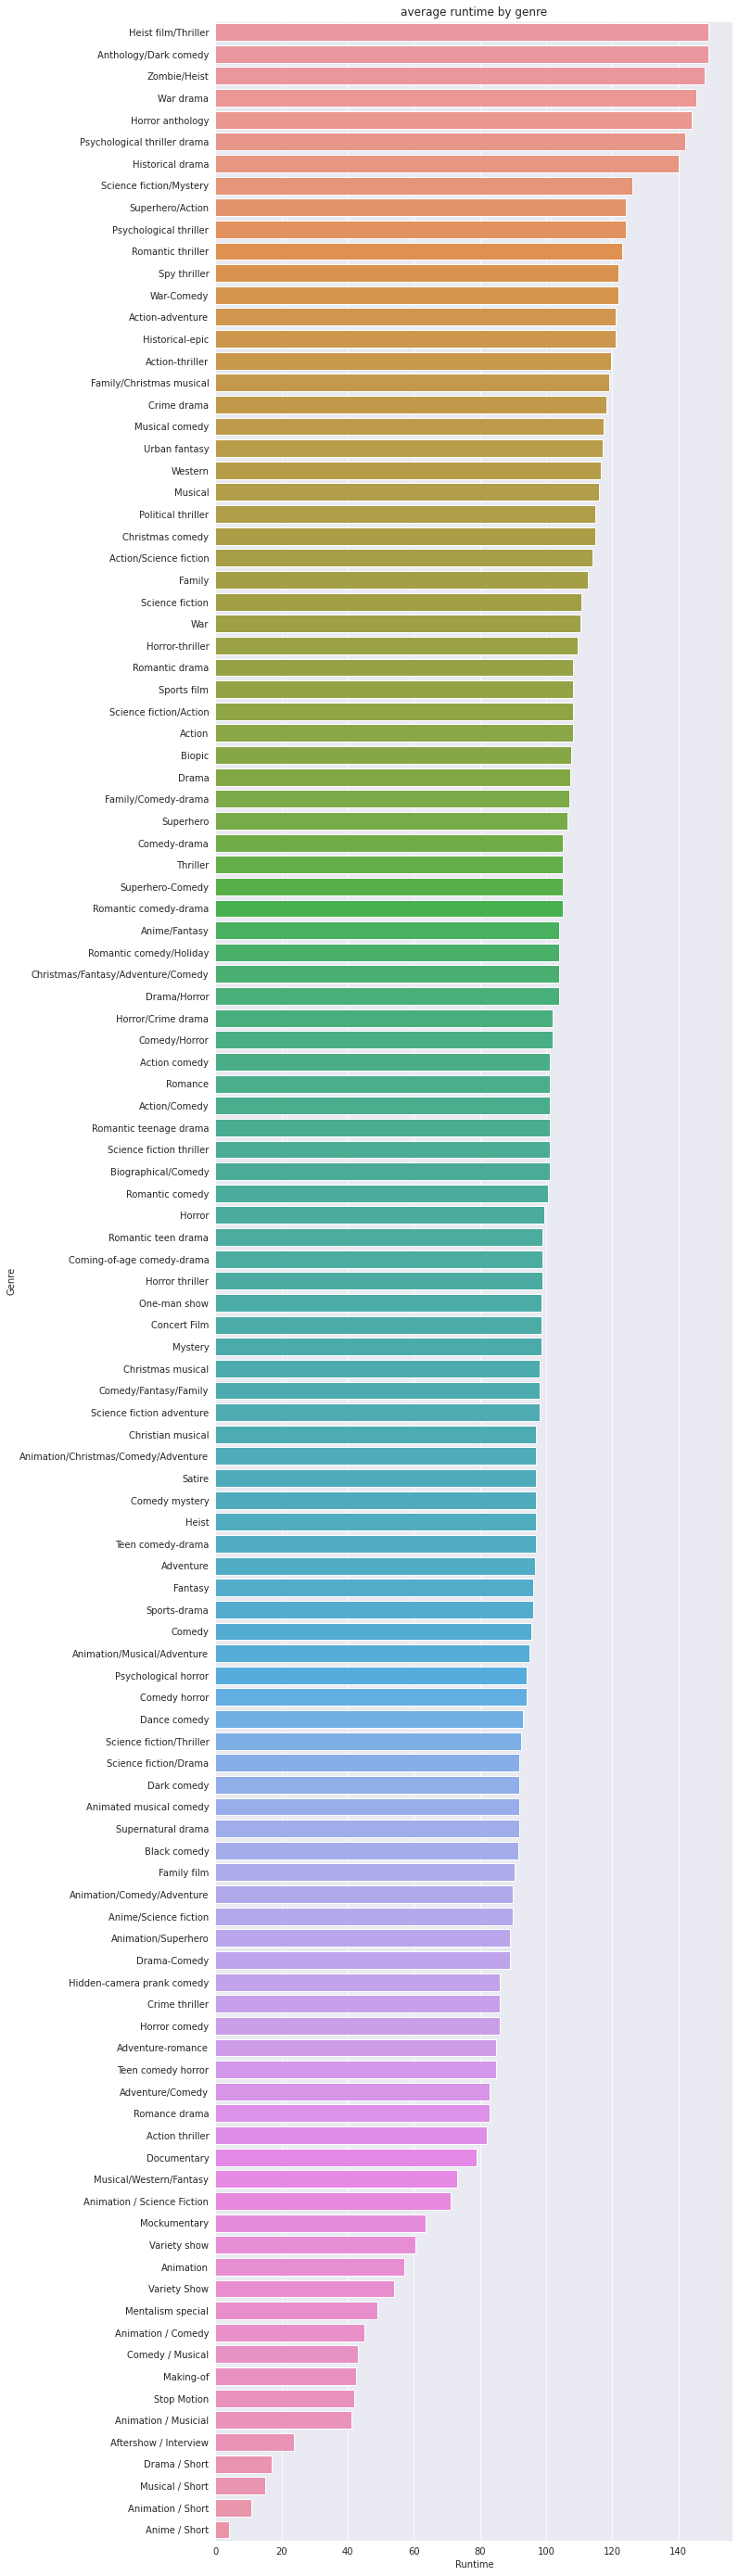

In [8]:
plt.figure(figsize=(10, 50))
sns.barplot(x='Runtime', y='Genre', data=data, ci=None,
            order=data.groupby('Genre')['Runtime'].mean().sort_values(ascending=False).index)
plt.title('average runtime by genre')

## Посмотрим, как фильмы распределены по языкам

Text(0.5, 1.0, 'Distribution of films by language')

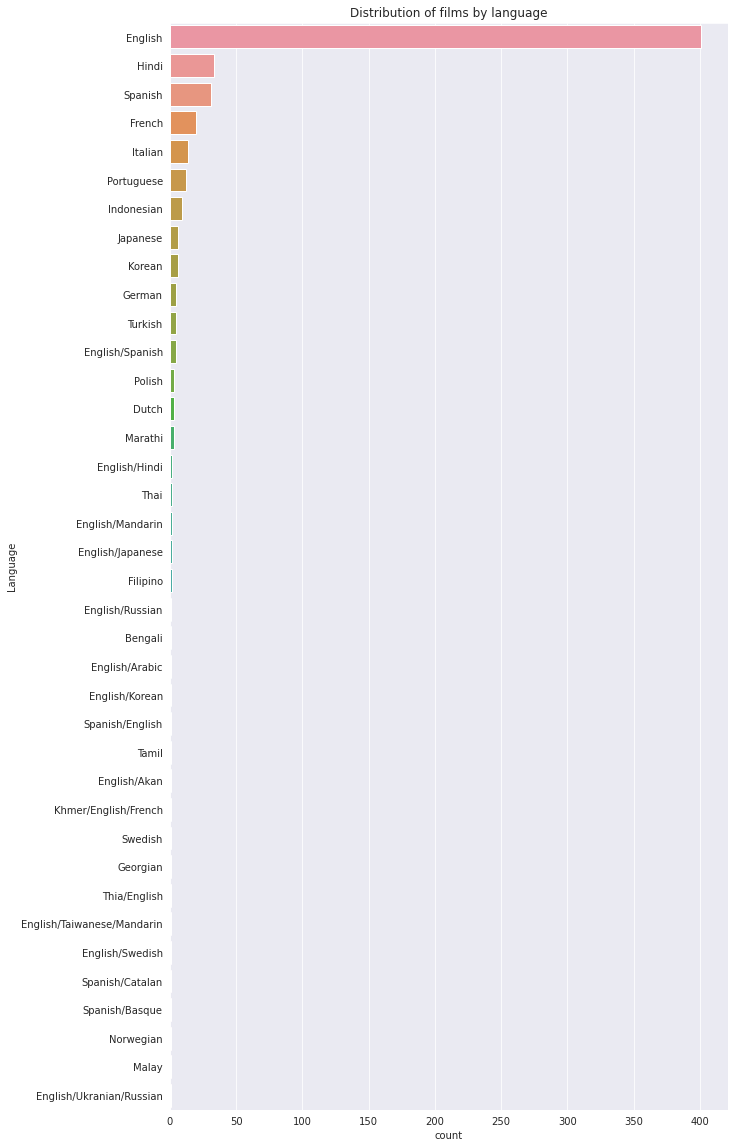

In [9]:
plt.figure(figsize=(10, 20))
sns.countplot(y='Language', data=data, order=data['Language'].value_counts().index)
plt.title('Distribution of films by language')

## Рассмотрим средние значения рейтинга IMDB по жанрам

Text(0.5, 1.0, 'Average score by language')

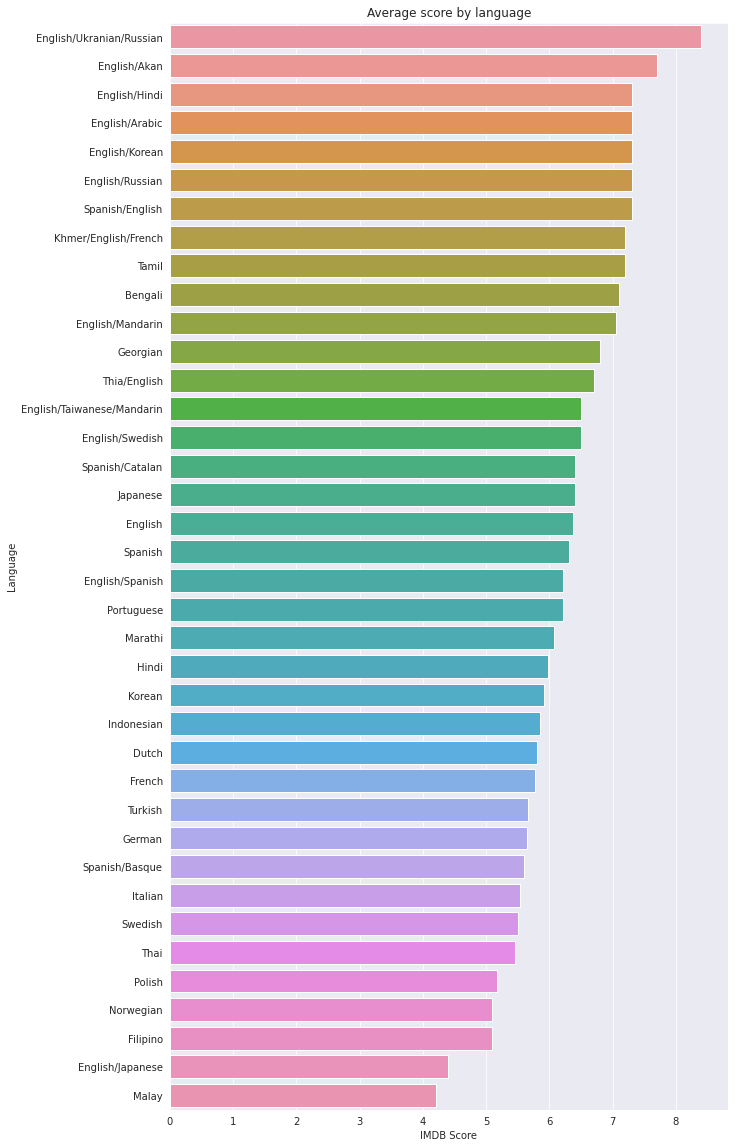

In [10]:
plt.figure(figsize=(10, 20))
sns.barplot(x='IMDB Score', y='Language', data=data, ci=None,
            order=data.groupby('Language')['IMDB Score'].mean().sort_values(ascending=False).index)
plt.title('Average score by language')

## Найдем лучший (по рейтингу IMDB) фильм для каждого жанра

Text(0.5, 1.0, 'Best films by genre and their scores')

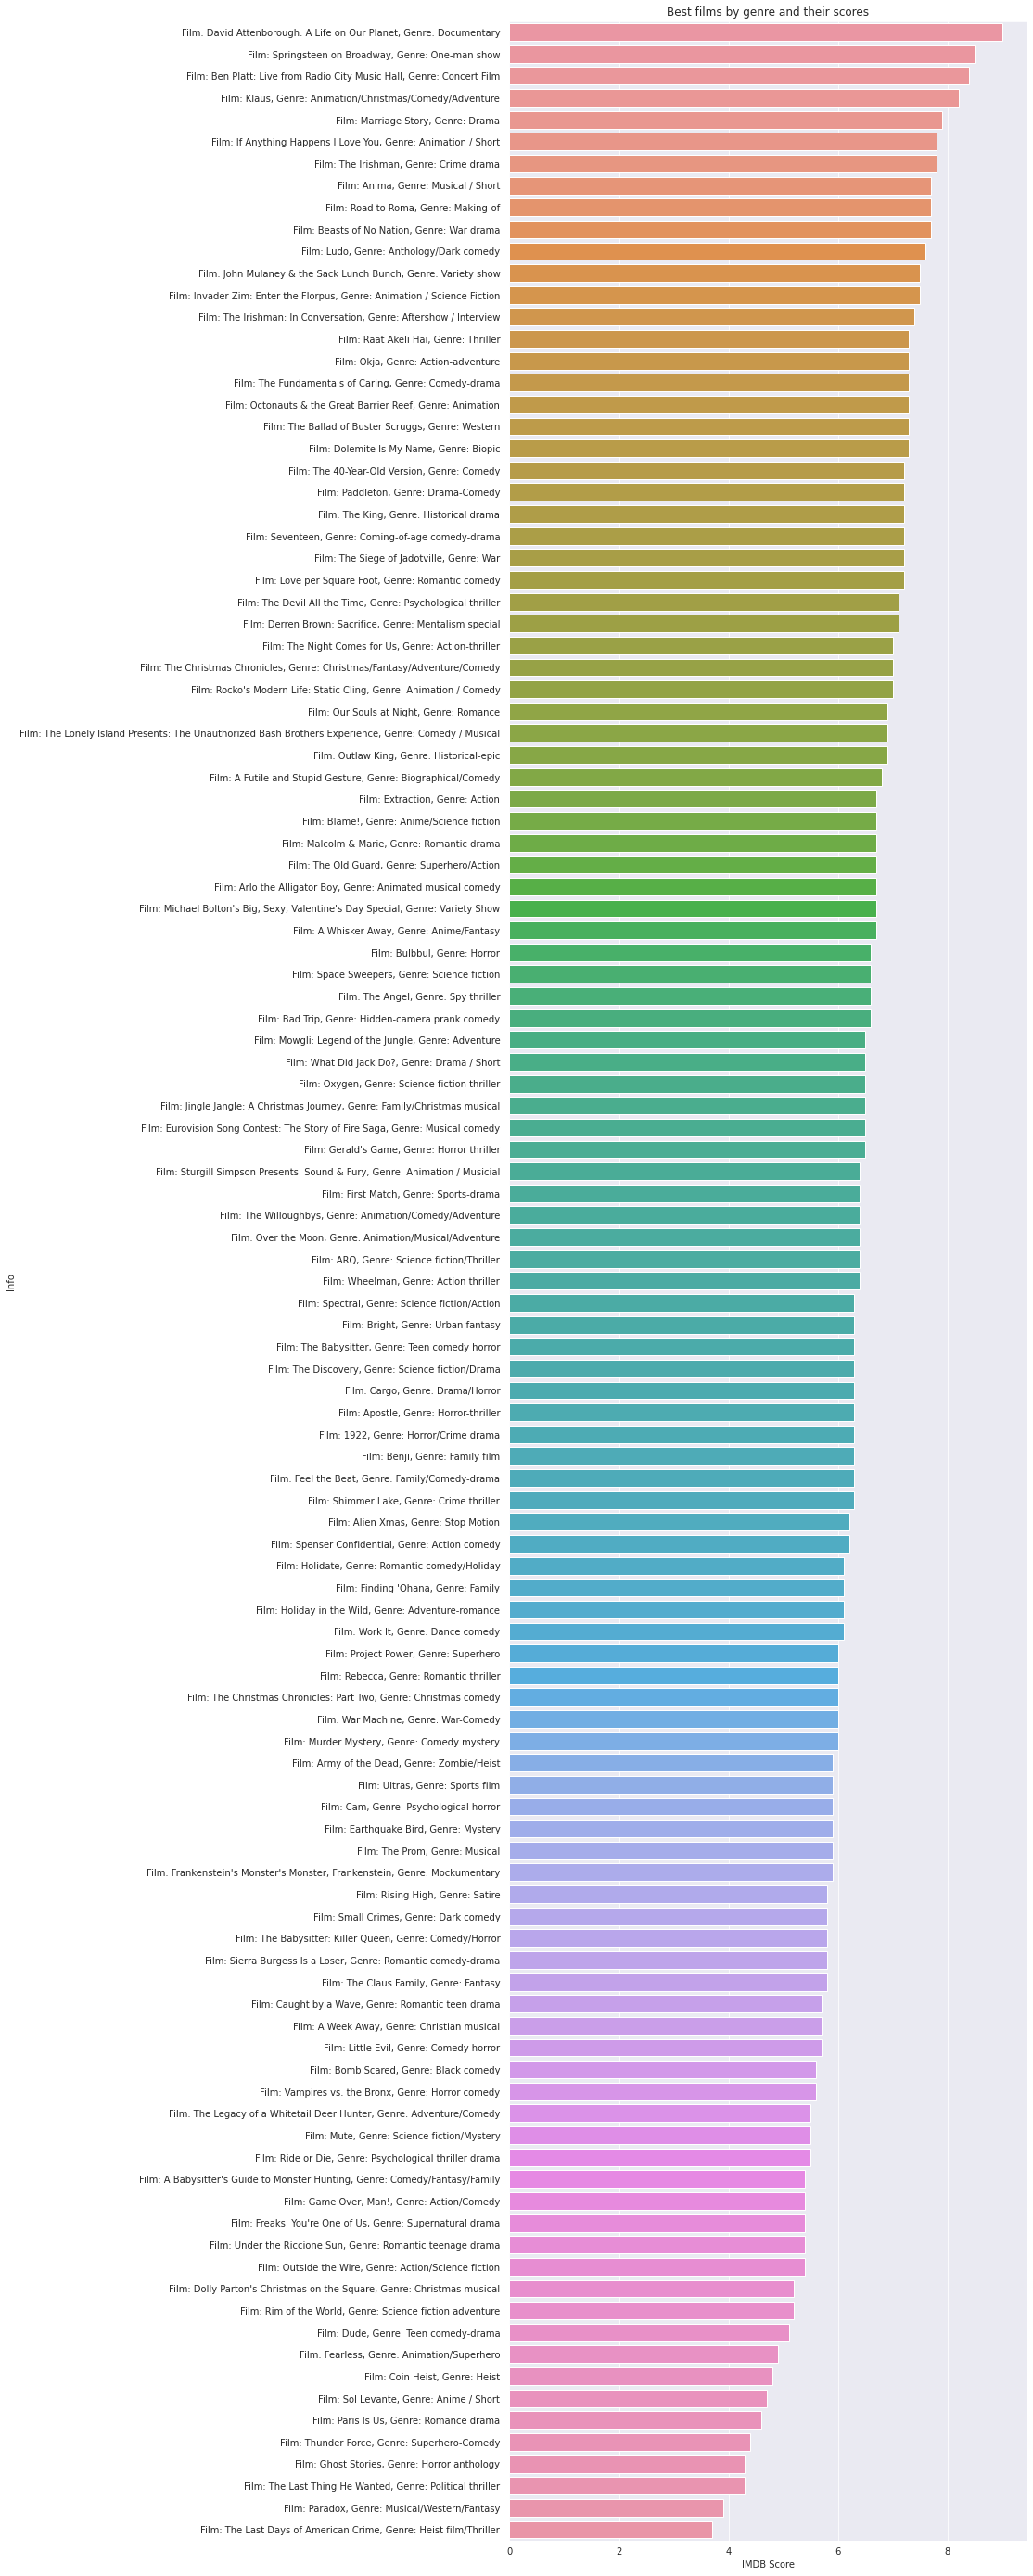

In [11]:
plt.figure(figsize=(10, 50))
top_genres_films = data.groupby('Genre')\
    .apply(lambda x: x.sort_values(by='IMDB Score', ascending=False).head(1))
top_genres_films['Info'] = top_genres_films[['Title', 'Genre']]\
    .apply(lambda x: f"Film: {x['Title']}, Genre: {x['Genre']} ", axis=1)
top_genres_films.sort_values(by='IMDB Score', ascending=False, inplace=True)
sns.barplot(x='IMDB Score', y='Info', data=top_genres_films)
plt.title('Best films by genre and their scores')

## Найдем самый старый и самый новый фильм

In [12]:
data['Premiere'] = pd.to_datetime(data['Premiere'])
data.sort_values(by='Premiere').iloc[[0, -1]]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
304,My Own Man,Documentary,2014-12-13,81,6.4,English
369,Blue Miracle,Drama,2021-05-27,95,6.7,English


## Найдем лучший и худший фильмы по рейтингу

In [13]:
data[(data['IMDB Score'] == data['IMDB Score'].min()) |
     (data['IMDB Score'] == data['IMDB Score'].max())]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


## Найдем самый короткий и самый длинный фильм

In [14]:
data[(data['Runtime'] == data['Runtime'].min()) |
     (data['Runtime'] == data['Runtime'].max())]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
40,Sol Levante,Anime / Short,2020-04-02,4,4.7,English
561,The Irishman,Crime drama,2019-11-27,209,7.8,English


## Conclusions:
1) Documentary is the biggest genre by the number of films
2) Animation/Christmas/Comedy/Adventure is the best genre by the average score
3) Heist film/Thriller is the longest in average runtime
4) Most films in English
5) "My Own Man" is the oldest movie
6) "Blue Miracle" is the newest movie
7) "Enter the Anime" is the worst by score
8) "David Attenborough: A Life on Our Planet" is the best by score
9) "Sol Levante" is the shortest movie
10) "The Irishman" is the longest movie

## Проверка гипотез

### Гипотеза 1
Исследуемая величина: IMDB Score
H0: случайная величина распределена нормально
H1: случайная величина не распределена нормально
Уровень значимости: alpha=0.05
Критерий: Шапиро-Уилка


In [15]:
alpha = 0.05
stat, p = shapiro(data['IMDB Score'])
if p < alpha:
    print('Отвергаем H0 с вероятностью 95%')
else:
    print('H0 не отвергнута')

Отвергаем H0 с вероятностью 95%


### Гипотеза 2
Исследуемая величина: Runtime
H0: величина имеет гауссово распределение
H1: величина не имеет гауссовского распределения
Уровень значимости: alpha=0.05
Критерий: Андерсона-Дарлинга

In [16]:
result = anderson(data['Runtime'])
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.572, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.782, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.085, data does not look normal (reject H0)


Вывод: нулевая гипотеза отклонена. Величина не имеет гауссовского распределения